In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.filters import threshold_multiotsu
from pylibCZIrw import czi as pyczi
from preprocessing import ZeissImageProcessor
import cv2
import json

In [2]:
path = os.listdir('temp/')
path

['0303fe93-67af-411b-99b3-888f5b20ebb7_measurements_points.json',
 '7950830c-9f91-40bf-be0e-9cbeed57bd9f_measurements_points.json',
 '8a66436b-7c1f-48a9-8a0b-79fd662fe632_measurements_points.json',
 'a7d9e0ef-cf53-4afb-a8fa-66e1201142ff_measurements_points.json',
 'b96e20cb-550a-4629-af3b-7af0f9174372_measurements_points.json']

In [4]:
with open('./temp/' + path[0], 'r') as file:

    data = json.load(file)

    

In [7]:
positions = data['fbd1645c-acd9-476b-8b55-b91e542bb24a']['position']

In [9]:
positions[0]

68163.09208676332

In [2]:
def get_mesh_nodes(image, ratio=1):
    # Blur
    blurred = cv2.GaussianBlur(image, (7, 7), 0)
    # Multi-Otsu
    thresholds = threshold_multiotsu(blurred, classes=3)
    t_high = thresholds[1]

    t_high *= ratio 
    
    _, thresh = cv2.threshold(blurred, t_high, 255, cv2.THRESH_BINARY)
    
    # Morfologia
    thresholded = cv2.morphologyEx(
        thresh, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8)
    )
    # Connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded)
    return centroids

In [3]:
def visualize_results(ZIP_object):

    plt.imshow(ZIP_object.image_to_analyze, cmap='gray')
    
    plt.colorbar()
    meas_points = ZIP_object.not_scaled_points
    

    for item in meas_points:
       
        point = item['position']
        plt.scatter(point[0], point[1], s=10)
    
    plt.title('Points for measurement')

# Markdown

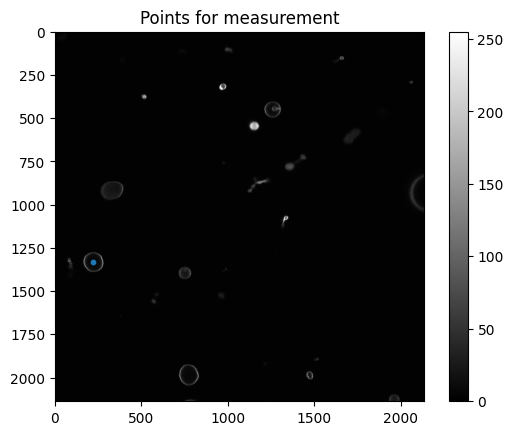

In [8]:
main_path = './czi_files/problem_results/'
files = [f for f in os.listdir(main_path) if f.lower().endswith('.czi')]
directions = [os.path.join(main_path, file_path) for file_path in files]  

obj1 = ZeissImageProcessor(directions[0], analysis_channel=0)
visualize_results(obj1)

In [9]:
obj1.not_scaled_points

[{'position': [221, 1334], 'radius': 5.8539838634237595}]

In [6]:
im = obj1.image_to_analyze

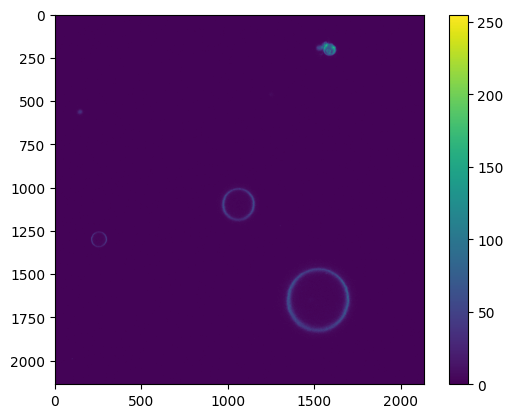

In [10]:
plt.imshow(im)
plt.colorbar()

In [11]:
thresh_mean = cv2.adaptiveThreshold(
    im,                  # wejściowy obraz (uint8, grayscale)
    255,                    # maksymalna wartość po binaryzacji
    cv2.ADAPTIVE_THRESH_MEAN_C,  # sposób obliczania progu (średnia w oknie)
    cv2.THRESH_BINARY,      # typ binaryzacji
    51,                     # rozmiar okna (musi być nieparzysty, np. 11, 31, 51)
    5                       # wartość odejmowana od średniej
)

thresh_gauss = cv2.adaptiveThreshold(
    im,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # próg = średnia ważona (Gauss)
    cv2.THRESH_BINARY,
    51,
    5
)

In [20]:
circles = cv2.HoughCircles(
    thresh_mean, 
    cv2.HOUGH_GRADIENT, 
    dp=1,             # rozdzielczość akumulatora
    minDist=20,       # minimalna odległość między środkami kółek
    param1=50,        # próg dla Canny edge detector wewnątrz Hough
    param2=30,        # próg akumulatora (im wyższy, tym mniej fałszywych)
    minRadius=80,      # minimalny promień kółka
    maxRadius=500      # maksymalny promień kółka
)

In [21]:
circles.shape

(1, 1138, 3)

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

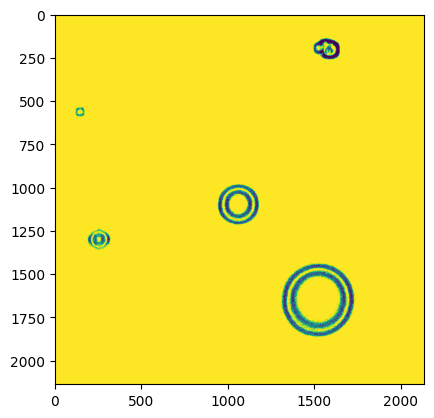

In [12]:
plt.imshow(thresh_mean)
plt.colorbar

In [15]:
found_contours, hierarchy = cv2.findContours(np.array(thresh_mean, dtype=np.uint8), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

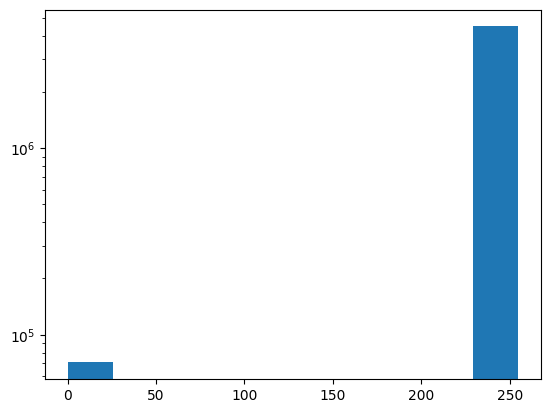

In [60]:
plt.hist(thresh_mean.flatten())
plt.yscale('log')

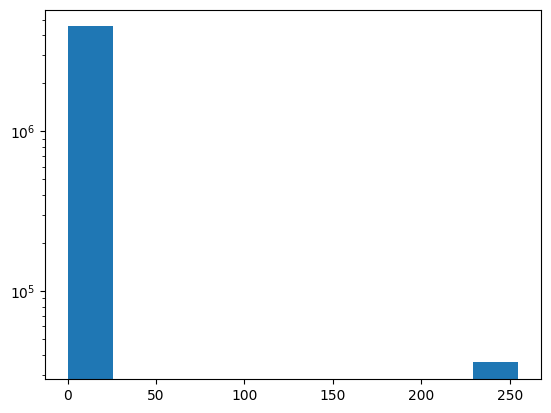

In [55]:
plt.hist(thresholded.flatten())
plt.yscale('log')

# Hexagonal mesh

In [4]:
main_path = 'czi_files/01092025-onchip-3rd'
files = [f for f in os.listdir(main_path) if f.lower().endswith('.czi')]
directions = [os.path.join(main_path, file_path) for file_path in files]   

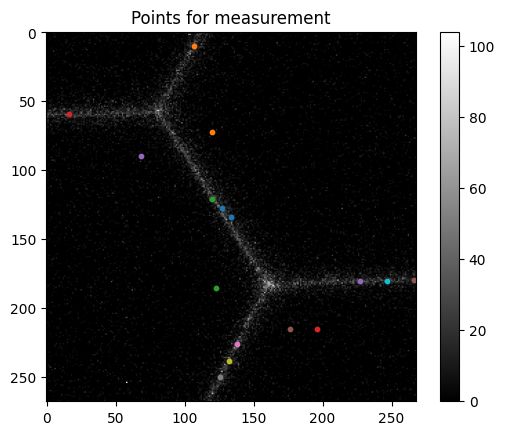

In [14]:
obj1 = ZeissImageProcessor(directions[6], chosen_analysis='hexagonal')
visualize_results(obj1)

In [6]:
points_list = obj1.measurement_points

In [7]:
points_list

[]

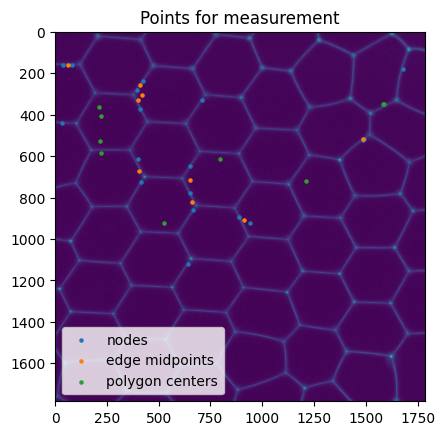

In [11]:
obj2 = ZeissImageProcessor(directions[1])
visualize_results(obj2)

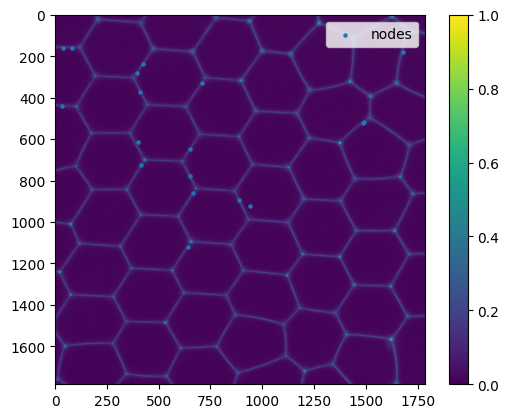

In [12]:
img2 = obj2.image_to_analyze
plt.imshow(img2)

nds2 = get_mesh_nodes(img2, ratio=1.09)

plt.scatter(nds2[:, 0], nds2[:, 1], s=5, label='nodes')

plt.legend()
plt.colorbar()

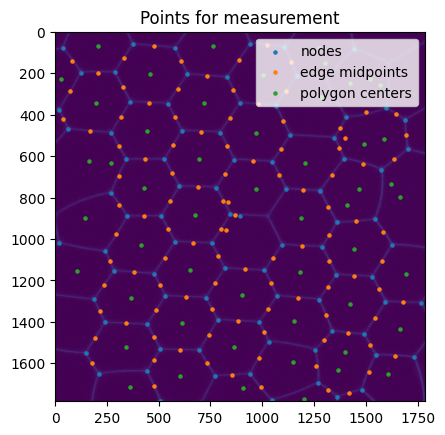

In [13]:
obj3 = ZeissImageProcessor(directions[7])
visualize_results(obj3)

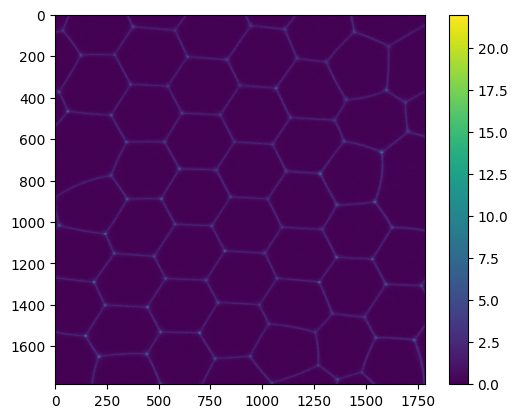

In [14]:
plt.imshow(obj3.image_to_analyze)
plt.colorbar()

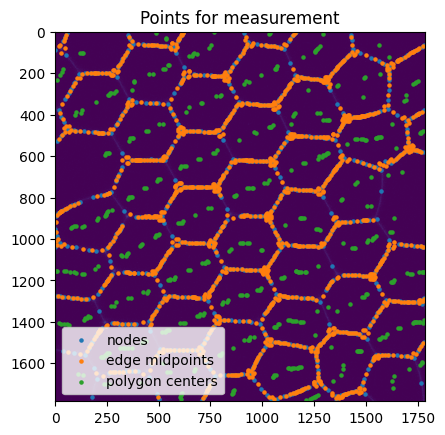

In [15]:
obj4 = ZeissImageProcessor(directions[8], analysis_channel=1)
visualize_results(obj4)

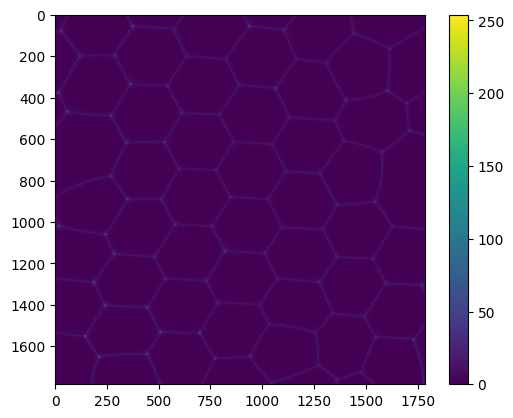

In [16]:
plt.imshow(obj4.image_to_analyze)
plt.colorbar()

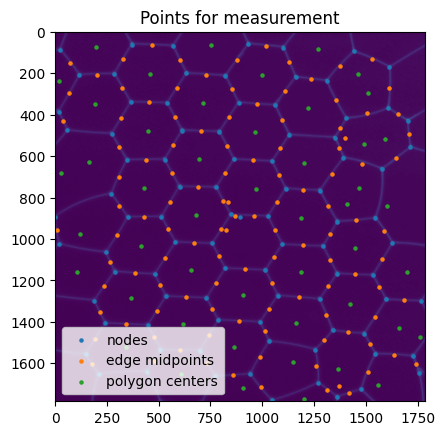

In [17]:
obj5 = ZeissImageProcessor(directions[9])
visualize_results(obj5)

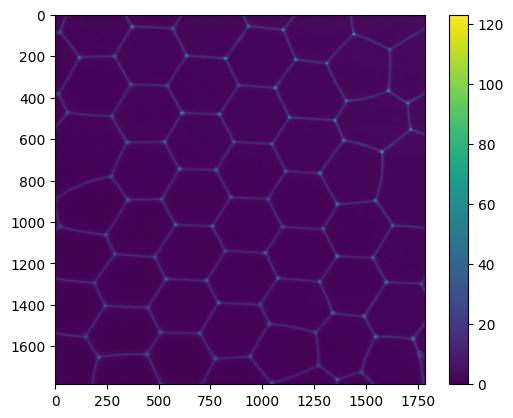

In [18]:
plt.imshow(obj5.image_to_analyze)
plt.colorbar()

# Testing the GUVs

In [4]:
main_path = 'GUVs_Laura/'
files = [f for f in os.listdir(main_path) if f.lower().endswith('.czi')]
directions = [os.path.join(main_path, file_path) for file_path in files]   

In [5]:
directions

['GUVs_Laura/Snap-10242.czi',
 'GUVs_Laura/Snap-10243.czi',
 'GUVs_Laura/Snap-10245.czi',
 'GUVs_Laura/Snap-10457.czi',
 'GUVs_Laura/Snap-10458.czi',
 'GUVs_Laura/Snap-10459.czi',
 'GUVs_Laura/Snap-10460.czi']

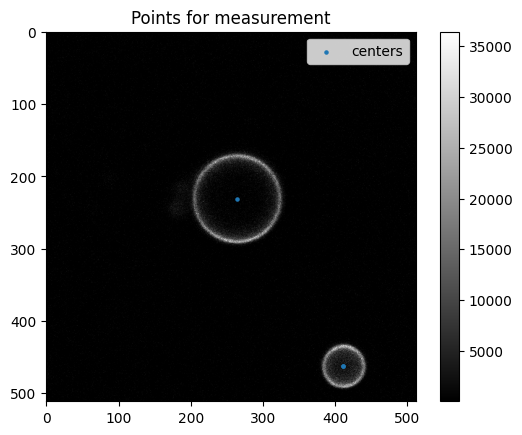

In [7]:
obj1 = ZeissImageProcessor(directions[0], analysis_channel=0, chosen_analysis='GUVs')

visualize_results(obj1)

In [67]:
def _classify_contours_by_area(contours, hierarchy, top_n=None):
    """
    Finds external contours and their internal contours, sorted by area in descending order.
    Args:
        contours (list): List of contours.
        hierarchy (numpy.ndarray): Contour hierarchy information.
        top_n (int, optional): Number of top external contours to return. If None, returns all.
    Returns:
        list: Tuples of (external_contour, internal_contours_list) sorted by external contour area.
    """
    # Map parent indices to their child contours
    parent_children_map = defaultdict(list)
    external_contours = []
    # Identify external contours and collect their largest internal
    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:  # External contour has no parent
            ext_contour = contours[i]
            area = cv2.contourArea(ext_contour)
            internal_contours = parent_children_map.get(i, [])
            # Find the largest internal contour if any
            largest_internal = None
            if internal_contours:
                largest_internal = max(internal_contours, key=lambda c: cv2.contourArea(c))
            external_contours.append((area, ext_contour, largest_internal))
    # Sort by external contour area (descending)
    external_contours.sort(reverse=True, key=lambda x: x[0])
    # Apply top_n limit
    if top_n is not None:
        external_contours = external_contours[:top_n]
    # Return tuples (external_contour, largest_internal_contour)
    return [(ext, largest_internal) for (_, ext, largest_internal) in external_contours]
def _create_mask(contours, image_shape):
    masks = []
    for contour in contours:
        mask = np.zeros(image_shape, dtype=np.uint8)
        if contour is not None:
            cv2.drawContours(mask, [contour], -1, 255, cv2.FILLED)
        masks.append(mask)
        # print(len(masks))
    return masks

def get_contour_centers_and_radii(contours):
    """
    Returns a dictionary mapping contour indices to dicts {center: (cx, cy), radius: r}
    """
    results = {}
    for idx, cnt in enumerate(contours):
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
        # else:
        #     cx, cy = None, None  # brak centrum dla konturów o zerowej powierzchni
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            
        results[idx] = {"center": (cx, cy), "radius": int(radius)}
    return results

In [73]:
mean_radius

{0: {'center': (264, 231), 'radius': 63},
 1: {'center': (411, 463), 'radius': 31}}

NameError: name 'mean_radius' is not defined

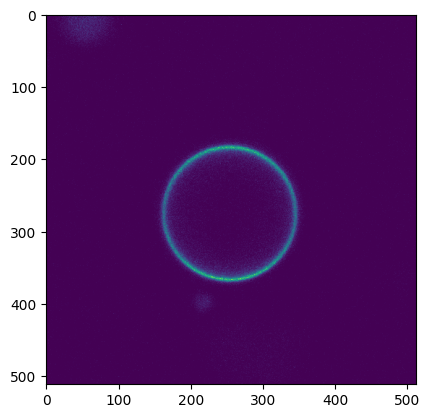

In [12]:
plt.imshow(obj1.image_to_analyze)

points = np.array([v['center'] for v in mean_radius.values()])[0:15]

plt.scatter(points[:, 0], points[:, 1], s=5, label="middle")
#plt.legend()

In [75]:
obj1.metadata

{'scaling_um_per_pixel': {'X': 1.2478515625e-07, 'Y': 1.2478515625e-07},
 'channels': [{'id': None,
   'name': '',
   'emission_nm': None,
   'excitation_nm': None},
  {'id': None, 'name': 'ATTO 655', 'emission_nm': None, 'excitation_nm': None},
  {'id': None, 'name': '', 'emission_nm': None, 'excitation_nm': None},
  {'id': None, 'name': 'Cy3', 'emission_nm': None, 'excitation_nm': None},
  {'id': None, 'name': '', 'emission_nm': None, 'excitation_nm': None},
  {'id': None, 'name': '', 'emission_nm': None, 'excitation_nm': None},
  {'id': None, 'name': 'ATTO 488', 'emission_nm': None, 'excitation_nm': None},
  {'id': None, 'name': '', 'emission_nm': None, 'excitation_nm': None},
  {'id': None, 'name': '', 'emission_nm': None, 'excitation_nm': None},
  {'id': 'Channel:0',
   'name': None,
   'emission_nm': 683.0,
   'excitation_nm': 663.0},
  {'id': 'Channel:1',
   'name': None,
   'emission_nm': None,
   'excitation_nm': None},
  {'id': 'Channel:2',
   'name': None,
   'emission_nm': 

# Testing GUVs my result

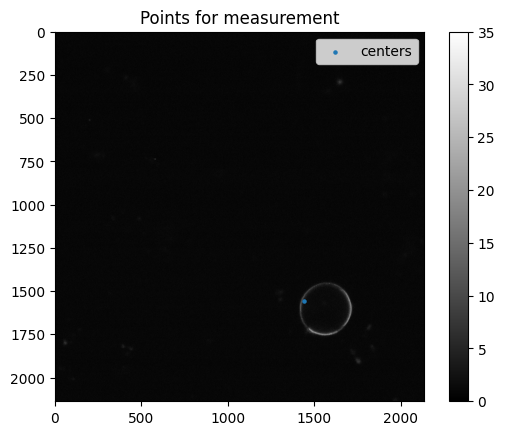

In [6]:
main_path = 'results'
files = [f for f in os.listdir(main_path) if f.lower().endswith('.czi')]
directions = [os.path.join(main_path, file_path) for file_path in files]

obj1 = ZeissImageProcessor(directions[0], analysis_channel=0, chosen_analysis='GUVs')

visualize_results(obj1)

In [7]:
obj1.image_to_analyze.shape[0]/2

1069.0

In [24]:
sx = obj1.metadata['scaling_um_per_pixel'].get('X') * 10**(6)
sy = obj1.metadata['scaling_um_per_pixel'].get('Y') * 10**(6)

x =  (1443-obj1.image_to_analyze.shape[0]/2) * sx
x

37.10830449017773

In [25]:
sp = obj1.metadata['stage_position'][0].get('x')

In [26]:
sp + x

67989.46130449018